**Ironhack Final Project**

---

**Notebook 01 - EDA for GBD19 data**

---

**Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#maps
import folium
from folium import Choropleth, Circle, Marker, Icon, Map, TileLayer
import json

# Visualization mantra
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context('poster')
sns.set(rc={'figure.figsize': (10, 5)})
sns.set_style('whitegrid')
# sns.set_style("whitegrid", {'axes.grid' : False})

---

**GBD19: Number of deaths caused by Breast cancer and COPD in Europe (1990-2019)**

In [2]:
disease = pd.read_csv('../data/GBD19/disease/IHME-GBD_2019_DATA-COPD-BREASTCANCER.csv') # No missing values

In [3]:
disease = disease[['location_name','cause_name','metric_name','year','val','upper','lower']] # Subset

In [4]:
disease

,location_name,cause_name,metric_name,year,val,upper,lower
0,Greece,Breast cancer,Number,1990,1806.747677,1884.954022,1711.507788
1,Greece,Breast cancer,Percent,1990,0.019742,0.020573,0.018728
2,Greece,Breast cancer,Rate,1990,17.390057,18.142798,16.473367
3,Ireland,Chronic obstructive pulmonary disease,Number,1990,2051.763615,2174.328734,1795.266532
4,Ireland,Chronic obstructive pulmonary disease,Percent,1990,0.066673,0.070520,0.058262
...,...,...,...,...,...,...,...
8635,Russian Federation,Chronic obstructive pulmonary disease,Percent,2019,0.020399,0.023369,0.018876
8636,Russian Federation,Chronic obstructive pulmonary disease,Rate,2019,24.866274,29.408529,21.267198
8637,Monaco,Chronic obstructive pulmonary disease,Number,2019,16.341988,19.215555,13.200340
8638,Monaco,Chronic obstructive pulmonary disease,Percent,2019,0.031227,0.035806,0.025815


In [5]:
disease = disease.sort_values(by=['location_name','year','cause_name'], ascending = True) # Sort by country

In [6]:
disease['location_name'] = disease['location_name'].str.replace('Russian Federation','Russia')
disease['location_name'] = disease['location_name'].str.replace('Bosnia and Herzegovina','Bosnia and Herz.')

In [33]:
disease.shape

(8640, 7)

In [34]:
disease = disease[disease['location_name']!='Russia']

In [36]:
disease.shape

(8460, 7)

In [37]:
disease.to_csv('../data/GBD19/disease/IHME-GBD_2019_DATA-COPD-BREASTCANCER_clean.csv', index = False)

In [38]:
condition_disease = (disease['cause_name'] == 'Chronic obstructive pulmonary disease')
condition_metric = (disease['metric_name'] == 'Percent')
condition_location = (disease['location_name'] == 'Eastern Europe') | (disease['location_name'] == 'Central Europe') | (disease['location_name'] == 'Western Europe') | (disease['location_name'] == 'India')
disease_deaths_copd_global = disease[condition_disease & condition_metric & condition_location]

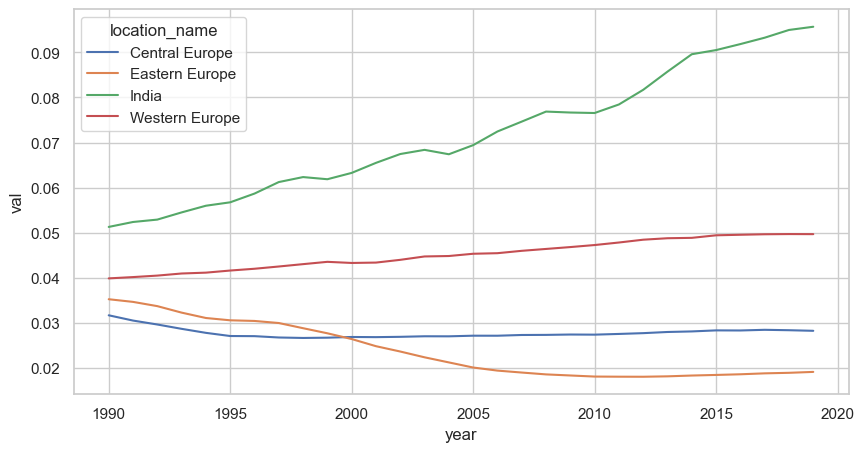

In [39]:
sns.lineplot(x = 'year', y = 'val', data = disease_deaths_copd_global, hue = 'location_name');

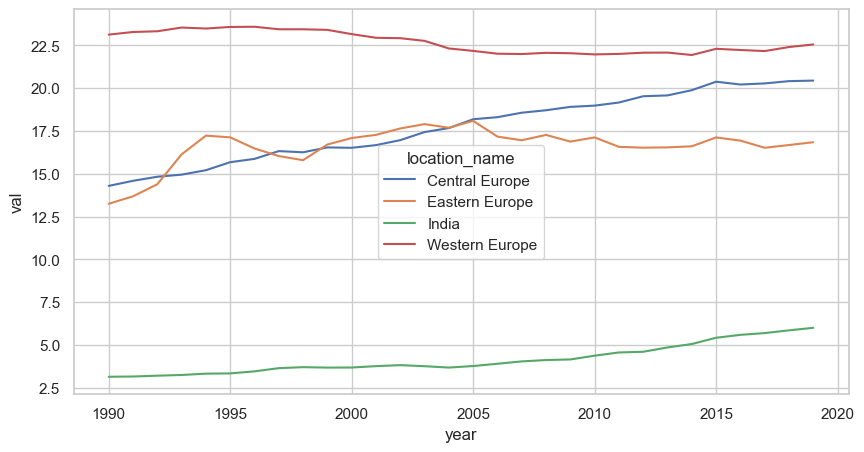

In [40]:
condition_disease = (disease['cause_name'] == 'Breast cancer')
condition_metric = (disease['metric_name'] == 'Rate')
condition_location = (disease['location_name'] == 'Eastern Europe') | (disease['location_name'] == 'Central Europe') | (disease['location_name'] == 'Western Europe') | (disease['location_name'] == 'India')
disease_deaths_cancer_global = disease[condition_disease & condition_metric & condition_location]
sns.lineplot(x = 'year', y = 'val', data = disease_deaths_cancer_global, hue = 'location_name');

In [41]:
disease['location_name'].unique()

array(['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium',
       'Bosnia and Herz.', 'Bulgaria', 'Central Europe', 'Croatia',
       'Cyprus', 'Czechia', 'Denmark', 'Eastern Europe', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'India', 'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Monaco', 'Montenegro', 'Netherlands',
       'North Macedonia', 'Norway', 'Poland', 'Portugal',
       'Republic of Moldova', 'Romania', 'San Marino', 'Serbia',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Ukraine', 'United Kingdom', 'Western Europe'], dtype=object)

**GBD19: PM in Europe (1990-2019)**

In [42]:
pm = pd.read_csv('../data/GBD19/pm/GBD_AIR_POLLUTION_1990_2019.csv') # No missing values

In [43]:
list_countries = disease['location_name'].unique()

In [44]:
pm = pm[pm['location_name'].isin(list_countries)] # subset countries

In [45]:
pm = pm[['location_name','rei_name','year_id','mean','median','upper','lower']] # subset columns

In [46]:
pm = pm.sort_values(by=['location_name','year_id']) # sort by country and year

In [47]:
pm

,location_name,rei_name,year_id,mean,median,upper,lower
560,Albania,Ambient particulate matter pollution,1990,24.947482,23.761740,42.552035,12.283387
561,Albania,Ambient particulate matter pollution,1995,24.129340,23.391146,38.688391,13.244507
562,Albania,Ambient particulate matter pollution,2000,24.302869,23.752234,36.885735,14.896325
563,Albania,Ambient particulate matter pollution,2005,22.169490,21.867823,30.576744,15.756878
564,Albania,Ambient particulate matter pollution,2010,21.631450,21.627829,24.318940,19.076510
...,...,...,...,...,...,...,...
989,Western Europe,Ambient particulate matter pollution,2015,12.527497,12.531273,12.661905,12.384283
990,Western Europe,Ambient particulate matter pollution,2016,11.488999,11.489316,11.612433,11.356507
991,Western Europe,Ambient particulate matter pollution,2017,11.669184,11.669513,11.801195,11.544239
992,Western Europe,Ambient particulate matter pollution,2018,11.684120,11.683466,11.815184,11.558034


In [48]:
pm['location_name'] = pm['location_name'].str.replace('Russian Federation','Russia')
pm['location_name'] = pm['location_name'].str.replace('Bosnia and Herzegovina','Bosnia and Herz.')

In [49]:
pm['location_name'].unique()

array(['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bulgaria',
       'Central Europe', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
       'Eastern Europe', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'India', 'Ireland', 'Israel',
       'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland',
       'Portugal', 'Republic of Moldova', 'Romania', 'San Marino',
       'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Ukraine', 'United Kingdom', 'Western Europe'], dtype=object)

In [50]:
pm.to_csv('../data/GBD19/pm/GBD_AIR_POLLUTION_1990_2019_clean.csv', index = False)

In [51]:
# sns.lineplot(x = 'year_id', y = 'mean', data = pm, hue = 'location_name');

# Geojson

In [52]:
with open("../data/map/europe.json", encoding='utf-8') as geo_file:
    geo_europe = json.load(geo_file)

In [53]:
print(list_countries)

['Albania' 'Andorra' 'Austria' 'Belarus' 'Belgium' 'Bosnia and Herz.'
 'Bulgaria' 'Central Europe' 'Croatia' 'Cyprus' 'Czechia' 'Denmark'
 'Eastern Europe' 'Estonia' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'India' 'Ireland' 'Israel' 'Italy' 'Latvia'
 'Lithuania' 'Luxembourg' 'Malta' 'Monaco' 'Montenegro' 'Netherlands'
 'North Macedonia' 'Norway' 'Poland' 'Portugal' 'Republic of Moldova'
 'Romania' 'San Marino' 'Serbia' 'Slovakia' 'Slovenia' 'Spain' 'Sweden'
 'Switzerland' 'Ukraine' 'United Kingdom' 'Western Europe']


In [54]:
geo_countries = []
for i in range(len(geo_europe["features"])):
    geo_countries.append(geo_europe["features"][i]["properties"]["name"])

In [55]:
a_list = []
for i in geo_countries:
    if i not in list_countries:
        a_list.append(i)
print(a_list)

['Russia', 'Kosovo', 'Liechtenstein', 'Moldova', 'Vatican', 'Jersey', 'Guernsey', 'Isle of Man', 'Åland', 'Faeroe Is.']


In [64]:
# #using plotly for an animated choropleth map
# import plotly.express as px
# fig = px.choropleth_mapbox(data_frame=pm,
#                            geojson=geo_europe,
#                            locations=pm.location_name,
#                            featureidkey = 'properties.name',
#                            color='mean',
#                            center={'lat':55, 'lon':25},
#                            mapbox_style='open-street-map',
#                            zoom=2,
#                            color_continuous_scale='sunset',
#                            range_color=(0, 50),
#                            animation_frame='year_id',
#                            width=800,
#                            height=600)

# fig.show()

In [58]:
disease.head()

,location_name,cause_name,metric_name,year,val,upper,lower
168,Albania,Breast cancer,Number,1990,112.778225,122.598264,103.645504
169,Albania,Breast cancer,Percent,1990,0.006453,0.007027,0.005943
170,Albania,Breast cancer,Rate,1990,3.407278,3.703963,3.131359
42,Albania,Chronic obstructive pulmonary disease,Number,1990,722.546343,797.220675,483.072341
43,Albania,Chronic obstructive pulmonary disease,Percent,1990,0.041342,0.045766,0.027863


In [63]:

# data = disease[(disease['cause_name']=='Chronic obstructive pulmonary disease') & (disease['metric_name']=='Percent')]

# fig2 = px.choropleth_mapbox(data_frame=data,
#                            geojson=geo_europe,
#                            locations=data.location_name,
#                            featureidkey = 'properties.name',
#                            color='val',
#                            center={'lat':55, 'lon':25},
#                            mapbox_style='open-street-map',
#                            zoom=2,
#                            color_continuous_scale='sunset',
#                            range_color=(0, 0.08),
#                            animation_frame='year',
#                            width=800,
#                            height=600)

# fig2.show()